# Tutorial 3

In [1]:
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

## Exercice 1

### a)

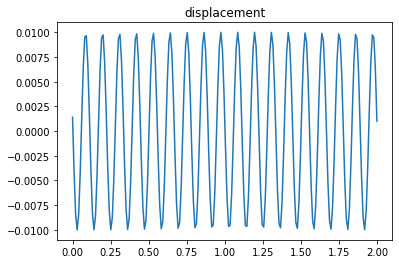

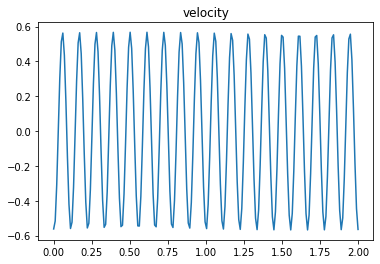

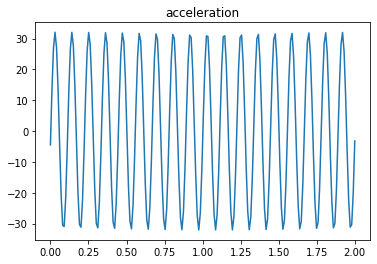

In [14]:
x0 = 0.0001

v0 = 4 * (10 ** -2)

m= 62.5 * (10 ** -3)

k = 200

g = 9.8

w0 = np.sqrt(k/m)

A = np.sqrt(x0 + (v0 / w0)**2 )

phi = np.arctan(v0 / (x0 * w0))

t = np.linspace(0, 2, 2*100)
   
    
displacement = A * np.cos(w0 * t + phi)
plt.plot(t, displacement)
plt.title("displacement")
plt.show()
velocity = -A * w0 * np.sin(w0 * t + phi)
plt.plot(t, velocity)
plt.title("velocity")
plt.show()
acceleration = -A * (w0 ** 2) * np.cos(w0 * t + phi)
plt.plot(t, acceleration)
plt.title("acceleration")
plt.show()

### b)

In [15]:
def free_response(m, k, t, x0 = 0.0001, v0 =  4 * (10 ** -2)):
    w0 = np.sqrt(k/m)
    phi = np.arctan(v0 / (x0 * w0))
    A = np.sqrt(x0 + (v0 / w0)**2 )
    return A * np.cos(w0 * t + phi)
    

In [21]:
displacement_i = free_response(60 * (10 ** -3), 200, t)

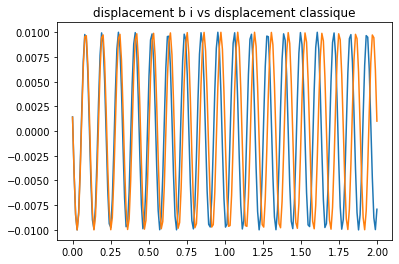

In [22]:
plt.plot(t, displacement_i, t, displacement)
plt.title("displacement b i vs displacement classique")
plt.show()

On observe au fur et à mesure du temps que la masse la plus lourde (62,5) met plus de temps à retourner à son point d'équilibre. (On a en orange la masse la plus lourde)

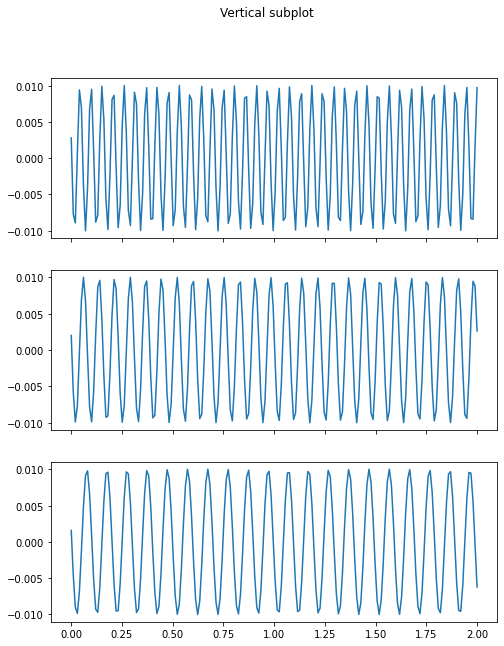

In [34]:
displacement_30 = free_response(30 * (10 ** -3), 400, t)
displacement_60 = free_response(60 * (10 ** -3), 400, t)
displacement_100 = free_response(100 * (10 ** -3), 400, t)

fig, axs = plt.subplots(3, sharex=True, figsize=(8,10))
fig.suptitle('Vertical subplot')
axs[0].plot(t, displacement_30)
axs[1].plot(t, displacement_60)
axs[2].plot(t, displacement_100) 
plt.show()

Plus la masse de l'objet est lourde, plus elle met du temps à accomplir son cycle (une période)

Plus la variable k est grande, plus la période est petite. L'objet prendra donc moins de temps à accomplir son cycle.